In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
pwd

'/content'

In [4]:
os.chdir('gdrive/My Drive/COURSES/ROBOTICS LABORATORY/SPAD WORKSHOP')

In [5]:
pwd

'/content/gdrive/MyDrive/COURSES/ROBOTICS LABORATORY/SPAD WORKSHOP'

In [ ]:
!git clone https://github.com/senth-srmist/test_repo

In [6]:
data = np.fromfile('test_repo/velodyne_points/data/0000000000.bin',dtype=np.float32) # Point Cloud Data

In [7]:
data.shape

(493588,)

In [8]:
print(data[0]) #X
print(data[1]) #Y
print(data[2]) #Z
print(data[3]) #Reflectance

22.719
0.031
0.977
0.32


In [9]:
print(data[4]) #X
print(data[5]) #Y
print(data[6]) #Z
print(data[7]) #Reflectance

18.052
0.076
0.82
0.46


In [10]:
data_mod = data.reshape(-1, 4)

In [11]:
data_mod.shape

(123397, 4)

In [12]:
print(data_mod[:10,:])

[[22.719  0.031  0.977  0.32 ]
 [18.052  0.076  0.82   0.46 ]
 [18.026  0.132  0.819  0.24 ]
 [23.032  0.249  0.988  0.3  ]
 [23.139  0.323  0.992  0.35 ]
 [23.258  0.361  0.996  0.27 ]
 [23.517  0.439  1.004  0.22 ]
 [23.579  0.515  1.007  0.43 ]
 [23.635  0.59   1.009  0.42 ]
 [23.699  0.666  1.011  0.4  ]]


In [13]:
np.max(data)

77.739

In [15]:
np.min(np.abs(data))

0.0

In [16]:
np.min(data)

-79.833

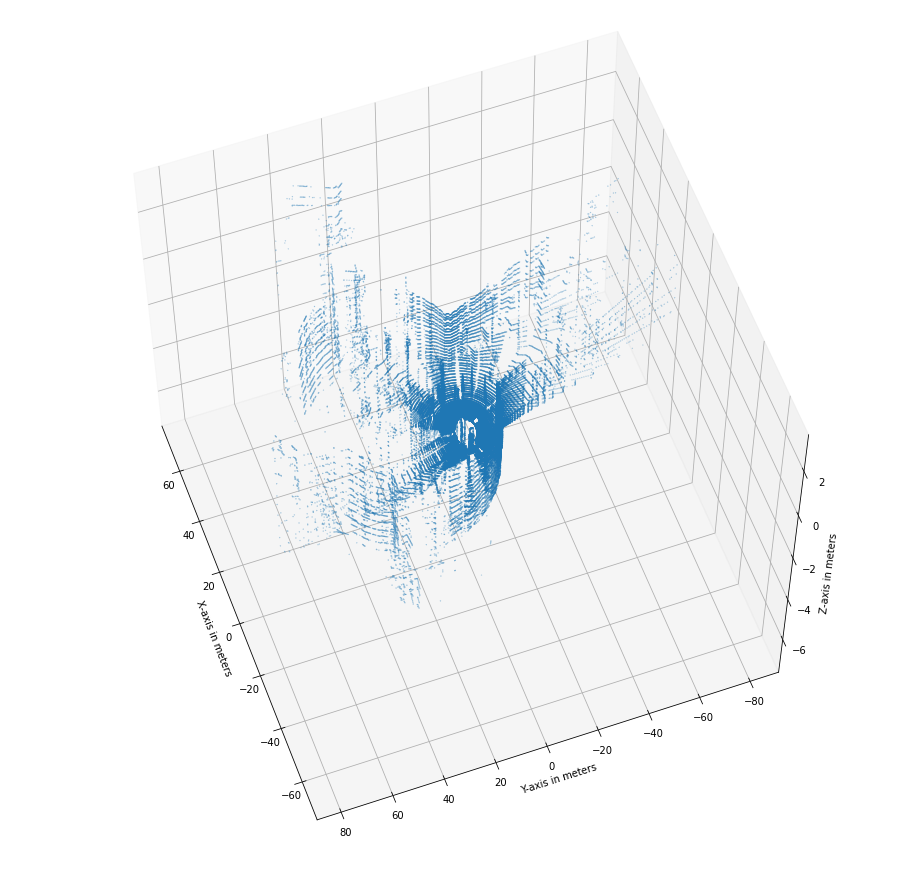

In [18]:
plt.figure(figsize=[16,16])
ax = plt.axes(projection = '3d')
ax.set_xlabel('X-axis in meters')
ax.set_ylabel('Y-axis in meters')
ax.set_zlabel('Z-axis in meters')
ax.scatter3D(data_mod[:,0],data_mod[:,1],data_mod[:,2],s=0.05)
ax.view_init(60,160)

In [25]:
dist_x = 35
dist_y = 35
j=0
temp = np.ndarray([data_mod.shape[0],3],dtype = np.float32) # pre-allocation to avoid CPU overhead
length = data_mod.shape[0]
for i in range(length):
  if (data_mod[i,0]>=-dist_x) & (data_mod[i,0]<=dist_x):
    if (data_mod[i,1]>=-dist_y) & (data_mod[i,1]<=dist_y):
      temp[j,:] = data_mod[i,0:3]
      j+=1

In [26]:
temp.shape

(123397, 3)

In [27]:
j

116025

In [28]:
lidar = temp[:j,:]

In [31]:
np.min(lidar)

-34.986

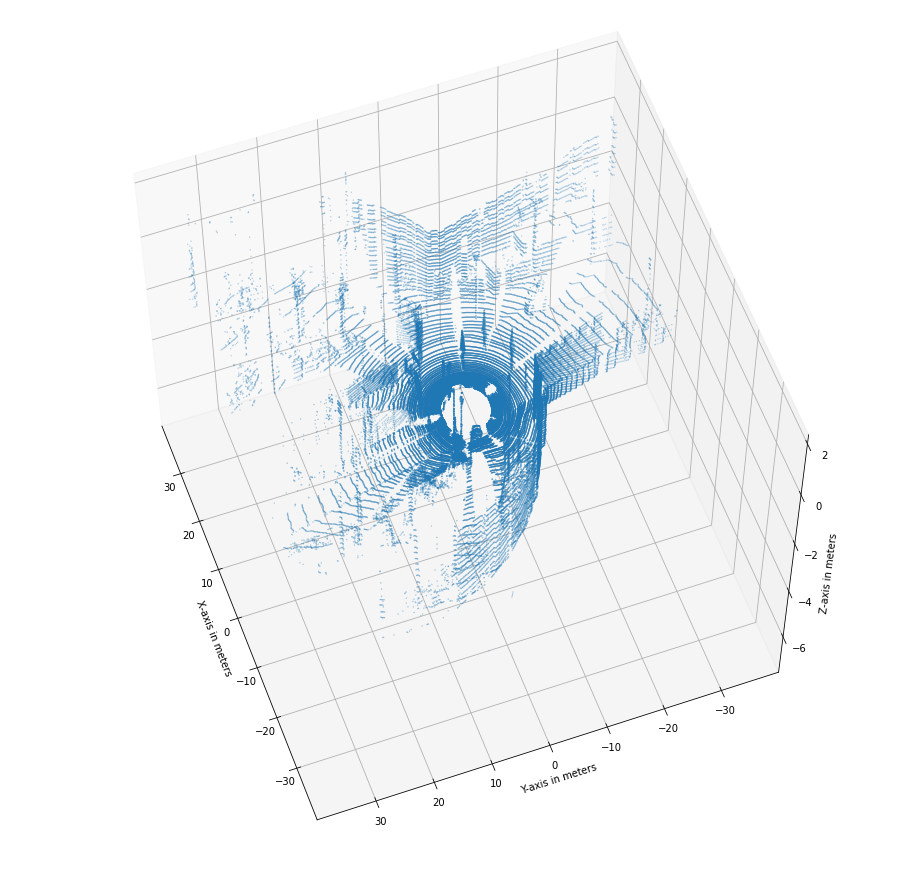

In [32]:
plt.figure(figsize=[16,16])
ax = plt.axes(projection = '3d')
ax.set_xlabel('X-axis in meters')
ax.set_ylabel('Y-axis in meters')
ax.set_zlabel('Z-axis in meters')
ax.scatter3D(lidar[:,0],lidar[:,1],lidar[:,2],s=0.05)
ax.view_init(60,160)